In [2]:
import pandas as pd
lit_df = pd.read_csv("../data/literatur.tsv", sep="\t", header=None, names=["title", "pubTitle", "volume", "entry"])

lit_df

,title,pubTitle,volume,entry
0,"A Lasco, Opera",Opera tam edita quam inedita,NaN,"Johannes a Lasco, Opera tam edita quam inedita..."
1,ABaslerRef,Aktensammlung zur Geschichte der Basler Reform...,NaN,Aktensammlung zur Geschichte der Basler Reform...
2,ABernerRef,Aktensammlung zur Geschichte der Berner Reform...,NaN,Aktensammlung zur Geschichte der Berner Reform...
3,ACO,Acta Conciliorum Oecumenicorum,NaN,"Acta Conciliorum Oecumenicorum, hg. v. Eduard ..."
4,ADB,Allgemeine Deutsche Biographie,NaN,"Allgemeine Deutsche Biographie, 55 Bde., Leipz..."
...,...,...,...,...
713,Zwa,Zwingliana,NaN,Zwingliana. Mitteilungen zur Geschichte Zwingl...
714,Zwingli Bibl. (Finsler),Zwingli-Bibliographie,NaN,"Georg Finsler, Zwingli-Bibliographie. Verzeich..."
715,Zürcher Kunst,Zürcher Kunst nach der Reformation. Hans Asper...,NaN,Zürcher Kunst nach der Reformation. Hans Asper...
716,"Zürcher, Pellikan (Zürcher)",Konrad Pellikans Wirken in Zürich 1526-1556,NaN,"Christoph Zürcher, Konrad Pellikans Wirken in ..."


In [3]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("footnote_stats.csv")
footnote_df.head()

,Unnamed: 0,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_sentence,text_footnote,pos_footnote,len_footnote
0,0,10013,20,3,2,"<persName xmlns=""http://www.tei-c.org/ns/1.0"">Wolfgang Joner, gen. R&#252;plin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gr&#252;ndete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBW</bibl> I <ref xmlns=""http://www.tei-c.org/ns/1.0"" target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.",Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,"Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.",10,33
1,1,10013,20,4,3,"Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schulund Studienzeit sowie als Lehrer im Kloster Kappel in <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 2-8.","Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pr&#281;claras.","Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schulund Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,12,21
2,2,10013,20,5,3,= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5","Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5",= exercites.,12,2
3,3,10013,20,6,4,"Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein k&#246;nnte, und beendet seine Aufz&#228;hlung mit folgender Angabe: &#8222;Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem &#8222;Promotores&#8220; nuncupavimus. Hos omnes latine scripsimus.&#8220;","Quicquid etiam lucubrationum tuarum__6<pb xmlns=""http://www.tei-c.org/ns/1.0"" type=""edition"" next=""734""/> copia resplendet.",Quicquid etiam lucubrationum tuarum__6 copia resplendet.,"Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. HBBibl I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. HBD 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein könnte, und beendet seine Aufzählung mit folgender Angabe: „Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem „Promotores“ nuncupavimus. Hos omnes latine scripsimus.“",3,90
4,4,10013,20,7,6,"Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7","Iacentque ea semper, quę apud quosque improbantur.“__7","Cicero, Tusculanae disputationes, 1, 2, 4.",6,6


In [17]:
from collections import defaultdict, Counter
from html import unescape  # from xml.sax.saxutils import unescape ->> does not work properly... :/
import re

lit_counter = defaultdict(int)
for xml_footnote in footnote_df["xml_footnote"]:
    matches = re.findall(r"<bibl.*?>(.*?)</bibl>", xml_footnote)
    for match in matches:
        match = unescape(match)  # take away excape sequences of the xml
        lit_counter[match] += 1

most_common_lit = Counter(lit_counter).most_common(10)
most_common_lit


[('SI', 3875),
 ('HBBW', 2472),
 ('EA', 964),
 ('HBBibl', 621),
 ('LB', 566),
 ('Adagia', 542),
 ('Z', 527),
 ('Grimm', 496),
 ('PC', 470),
 ('HBLS', 392)]

In [18]:
most_common_lit = dict(most_common_lit)

<BarContainer object of 10 artists>

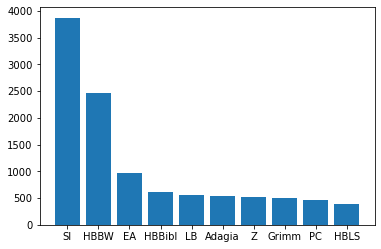

In [19]:
import matplotlib.pyplot as plt
labels = most_common_lit.keys()
values = most_common_lit.values()

plt.bar(labels, values)